**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance
from sklearn.metrics import accuracy_score#, pairwise_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
def func(neighbors):
    a = np.argmax(np.bincount(neighbors))
    return a

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        pass
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        pass
    
    def predict(self, X):
        my_n_neighbors = self.n_neighbors
        my_x = self.X
        my_y = self.y
        my_algorithm = self.algorithm
        if (my_algorithm == 'brute'):
            distance_arr = distance.cdist(X, my_x, metric = self.metric)
            neighbors_indices = np.argpartition(distance_arr, my_n_neighbors, axis=1)[:, :my_n_neighbors]
            
        if (my_algorithm == 'kd_tree'):
            my_tree = KDTree(my_x, metric = self.metric)
            dist, neighbors_indices = my_tree.query(X, k=my_n_neighbors)
            
        neighbors = my_y[neighbors_indices]
        answer = np.apply_along_axis(func, axis=1, arr=neighbors)
        return answer

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(accuracy_score(y_test, my_clf_pred))
#assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

1.0


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [89]:
%time clf.fit(X_train, y_train)

CPU times: user 889 µs, sys: 219 µs, total: 1.11 ms
Wall time: 968 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [90]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11 µs


In [91]:
%time clf.predict(X_test)

CPU times: user 3.24 ms, sys: 420 µs, total: 3.66 ms
Wall time: 3.58 ms


array([1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0])

In [92]:
%time my_clf.predict(X_test)

CPU times: user 1.7 ms, sys: 1.11 ms, total: 2.81 ms
Wall time: 2.05 ms


array([1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [93]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [95]:
%time clf.fit(X_train, y_train)

CPU times: user 1.35 ms, sys: 319 µs, total: 1.67 ms
Wall time: 1.53 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [96]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 12.2 µs


In [97]:
%time clf.predict(X_test)

CPU times: user 3.92 ms, sys: 577 µs, total: 4.5 ms
Wall time: 4.45 ms


array([1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0])

In [8]:
%time my_clf.predict(X_test)

CPU times: user 1.22 ms, sys: 940 µs, total: 2.16 ms
Wall time: 1.41 ms


array([1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2])

In [9]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [5]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [6]:
data = newsgroups['data']
target = newsgroups['target']
Y = target

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer( max_features=500)
X = vectorizer.fit_transform(data)            

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf.get_n_splits(X)

3

In [9]:
def knn_mean_score(X, Y, MyKNN, kf):
    total_score = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        MyKNN.fit(X_train, Y_train)
        knn_pred = MyKNN.predict(X_test)
        
        total_score += accuracy_score(Y_test, knn_pred)
    mean_score = total_score/kf.get_n_splits(X)
    return mean_score

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [10]:
def optimal_knn(X, Y, n_neighbors, kf,  algoritm='brute', metric='euclidean'):
    append_scores = []
    
    for neighbors in n_neighbors:
        knn = MyKNeighborsClassifier(n_neighbors=neighbors, algorithm=algoritm, metric=metric)
        curr_knn_score = knn_mean_score(X, Y, knn, kf)
        append_scores = np.append(append_scores, curr_knn_score)
        
    best_score = append_scores.max()
    idx_best = np.argmax(best_score)
    best_score_value = n_neighbors[idx_best]
    return best_score, append_scores

In [ ]:
best_score, scores = optimal_knn(X, Y, range(1,10), kf, algoritm='kd_tree', metric='euclidean')

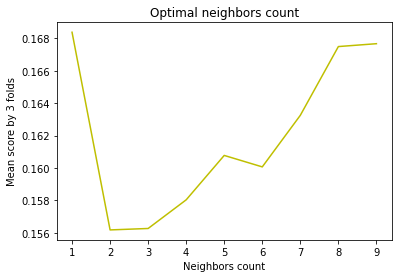

In [16]:
plt.plot(range(1, 10), scores, 'y')
plt.ylabel('Mean score by 3 folds'),
plt.xlabel('Neighbors count')
plt.title('Optimal neighbors count')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [111]:
best_score, scores = optimal_knn(X, Y, range(1,10), kf, algoritm='brute', metric='cosine')

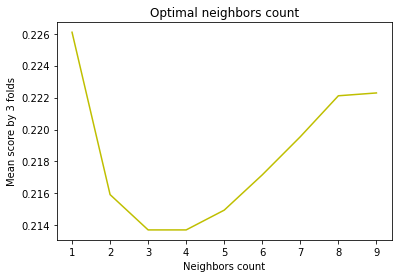

In [112]:
plt.plot(range(1, 10), scores, 'y')
plt.ylabel('Mean score by 3 folds'),
plt.xlabel('Neighbors count')
plt.title('Optimal neighbors count COSINE metric')
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
vectorizer = TfidfVectorizer(max_features=200, min_df=20, max_df=1000)
X = vectorizer.fit_transform(data).toarray()

In [48]:
best_score, scores = optimal_knn(X, Y, range(1,10), kf, algoritm='kd_tree')

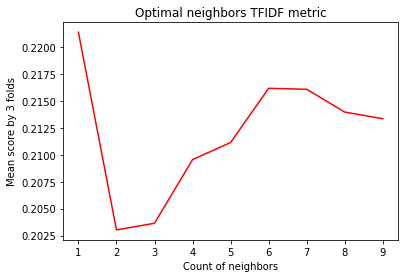

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1, 10), scores, 'r')
plt.ylabel('Mean score by 3 folds'),
plt.xlabel('Count of neighbors')
plt.title('Optimal neighbors TFIDF metric')
plt.show()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
best_score, scores = optimal_knn(X, Y, range(1,10), kf, algoritm='brute', metric='cosine')

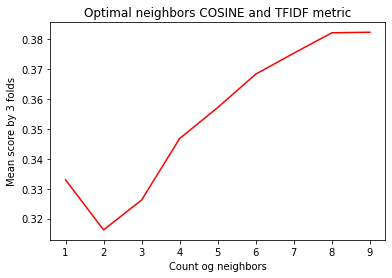

In [28]:
plt.plot(range(1, 10), scores, 'r')
plt.ylabel('Mean score by 3 folds'),
plt.xlabel('Count of neighbors')
plt.title('Optimal neighbors COSINE and TFIDF metric')
plt.show()

Косинусная метрика показала себя лучше TfidfVectorizer. 
А вот при запуске TfIdf и косинусной метрики результат показал себя в разы лучше! 

In [12]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [13]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [29]:
my_stopword_list = ['and','to','the','of', 'is', 'a', 'if', 'else', 'are', 'am']
tfidf_vectorizer = TfidfVectorizer(max_features=1000,stop_words=my_stopword_list, analyzer='word', token_pattern=r'(?u)\b[A-Za-z]+\b', min_df=15, max_df=300)
X_tfidf = tfidf_vectorizer.fit_transform(data).toarray()

In [30]:
X_test = tfidf_vectorizer.transform(test_data).toarray()

In [33]:
my_clf = MyKNeighborsClassifier(n_neighbors=50, algorithm='brute', metric='cosine')
my_clf.fit(X_tfidf, target)
accuracy_score(test_target, my_clf.predict(X_test))

0.460169941582581

In [41]:
clf = KNeighborsClassifier(n_neighbors=50, algorithm='brute', metric='cosine')
clf.fit(X_tfidf, target)
accuracy_score(test_target, clf.predict(X_test))

0.460169941582581

In [45]:
from sklearn.model_selection import cross_val_score

my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, X_test, test_target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.44105156435191134


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Смотрите 3 ячейки выше. Качество отличается потому что на тесте модель скорее всего переобучилась из-за параметров , подогнанных под тест. Вид тренировочных сильно может отличаться от тестовых, нежели наша модель разбитая на фолды, где одни фолды различаются с другими фолдами кросс-валидации.

Работает минут 10-15 (сжирает 8 гигабайт оперативной памяти)